In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores

from transformers import AutoModel, AutoModelForCTC

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../_data/fig-symmetry-audio-models/HUBERT-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [5]:
path = ["encoder.layers[", "].attention.q_proj.weight", "].attention.k_proj.weight"]

'HUBERT base (l = 12, d = 768, h = 8 ; 950M parameters)'
dh = 96
l = 12
d = 768
h = d // dh

model = AutoModel.from_pretrained("facebook/hubert-base-ls960")
score_List= get_scores(d, l, h, dh, model, path)
models['HUBERT-base'] = [l, d, h, dh, score_List]

'HUBERT large (l = 12, d = 768, h = 8 ; 950M parameters)'
dh = 64
l = 24
d = 1024
h = d // dh

model = AutoModel.from_pretrained("facebook/hubert-large-ll60k")
score_List= get_scores(d, l, h, dh, model, path)
models['HUBERT-large'] = [l, d, h, dh, score_List]

'HUBERT xlarge (l = 12, d = 768, h = 8 ; 950M parameters)'
dh = 80
l = 48
d = 1280
h = d // dh

model = AutoModel.from_pretrained("facebook/hubert-xlarge-ll60k")
score_List= get_scores(d, l, h, dh, model, path)
models['HUBERT-xlarge'] = [l, d, h, dh, score_List]

Some weights of the model checkpoint at facebook/hubert-xlarge-ls960-ft were not used when initializing HubertForCTC: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForCTC were not initialized from the model checkpoint at facebook/hubert-xlarge-ls960-ft and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a dow

AttributeError: 'HubertForCTC' object has no attribute 'encoder'

In [3]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

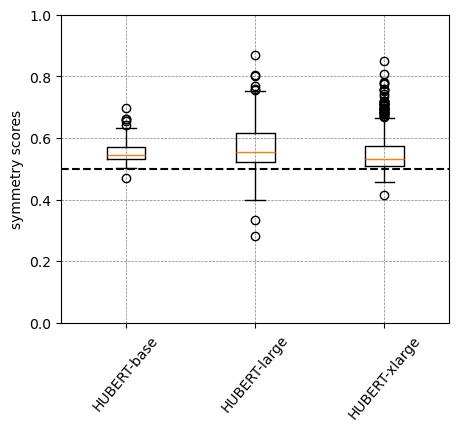

In [4]:
## boxplot visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(5,4))

plt.boxplot(SList)

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('symmetry scores')
plt.xticks(np.arange(1,len(names)+1),names)
plt.xticks(rotation=50)
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

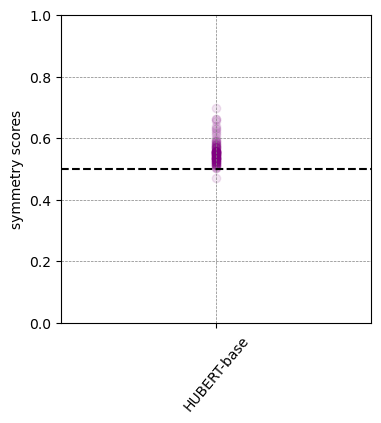

In [17]:
## mean and scatter visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(4,4))

for i, model in enumerate(SList):
    
    plt.scatter(i*np.ones(SList[i].size),(SList[i].flatten()),color='purple',alpha=.1)
    plt.scatter(i,(SList[i].flatten()).mean(),color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('symmetry scores')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation=50)
plt.ylim(0,1)
plt.axhline(y=.5,color='k',linestyle='dashed')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'BERT-tiny'),
  Text(1, 0, 'BERT-mini'),
  Text(2, 0, 'BERT-small'),
  Text(3, 0, 'BERT-medium'),
  Text(4, 0, 'BERT-base'),
  Text(5, 0, 'BERT-large'),
  Text(6, 0, 'distill-BERT')])

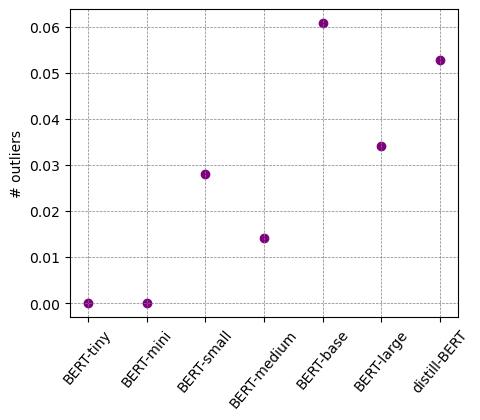

In [7]:
## percentage of outliers visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(5,4))

for i, model in enumerate(SList):
    
    outliers = count_outliers(SList[i].flatten())
    plt.scatter(i, outliers.sum() / SList[i].size, color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('# outliers')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation = 50)

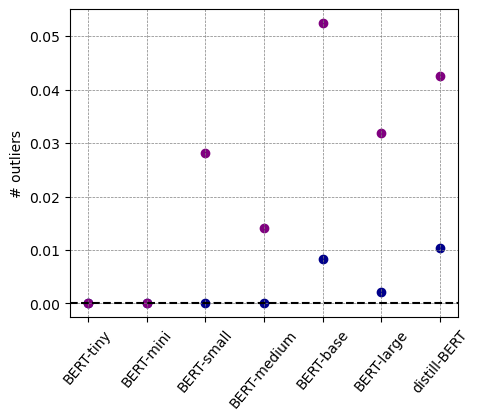

In [8]:
## percentage of outliers visualization

with open(dir, 'rb') as file:
    models = pickle.load(file)

SList = [models[key][-1].flatten() for key in list(models.keys())]
names = list(models.keys())

plt.figure(figsize=(5,4))

for i, model in enumerate(SList):
    
    outliers = count_outliers(SList[i].flatten())
    plt.scatter(i, outliers[outliers < .5].sum() / SList[i].size, color='darkblue')
    plt.scatter(i, outliers[outliers > .5].sum() / SList[i].size, color='purple')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.ylabel('# outliers')
plt.xticks(np.arange(len(names)),names)
plt.xticks(rotation = 50)
plt.axhline(y = .0,color='k',linestyle='dashed')